<a href="https://colab.research.google.com/github/HowardHNguyen/Machine-Learning-Deep-Learning/blob/main/House_Prices_Analysis_and_Prediction_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple and Multiple Linear Regression

Import required Python packages.

In [ ]:
!pip install pygam

In [ ]:
!pip install dmba

In [ ]:
!pip install --upgrade numpy
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 25.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

from pygam import LinearGAM, s, l
from pygam.datasets import wage


import seaborn as sns
import matplotlib.pyplot as plt

from dmba import stepwise_selection
from dmba import AIC_score

Colab environment detected.


In [ ]:
%matplotlib inline

In [ ]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
LUNG_CSV = DATA / '/content/drive/MyDrive/Practical_Statistics_for_Data_Scientists_DATA/LungDisease.csv'
HOUSE_CSV = DATA / '/content/drive/MyDrive/Practical_Statistics_for_Data_Scientists_DATA/house_sales.csv'

# Simple Linear Regression
## The Regression Equation

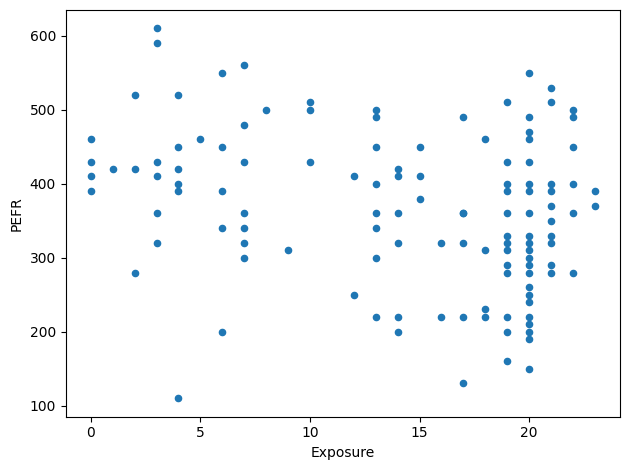

In [ ]:
lung = pd.read_csv(LUNG_CSV)

lung.plot.scatter(x='Exposure', y='PEFR')

plt.tight_layout()
plt.show()

In [ ]:
lung.shape

(122, 2)

# **Linear Regression model**

We can use the `LinearRegression` model from _scikit-learn_.

In [ ]:
predictors = ['Exposure']
outcome = 'PEFR'

model = LinearRegression()
model.fit(lung[predictors], lung[outcome])

print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')

Intercept: 424.583
Coefficient Exposure: -4.185


The intercept represents the predicted value of the target variable when all predictor variables are zero. In other words, it is the expected value of the target variable when the value of the predictor variables is zero.
In this case, when all predictor variables are zero, the model predicts a value of 424.583 for the target variable.

The coefficient for "Exposure" represents the estimated change in the target variable for a one-unit increase in the "Exposure" variable, assuming all other variables are held constant.
In this case, for every one-unit increase in the "Exposure" variable, the model predicts a decrease of 4.185 units in the target variable.

Putting it together, the linear regression equation can be expressed as:

`Target Variable = 424.583 - 4.185 x Exposure + Other Terms`

This equation allows us to make predictions for the target variable based on the values of the predictor variables, with the intercept accounting for the baseline prediction when all predictors are zero, and the coefficient for "Exposure" indicating how changes in "Exposure" influence the predicted target variable.

Keep in mind that the interpretation of coefficients depends on the specific context of our dataset and the assumptions of the regression model. Additionally, the interpretation may change if transformations or interactions are applied to the features.

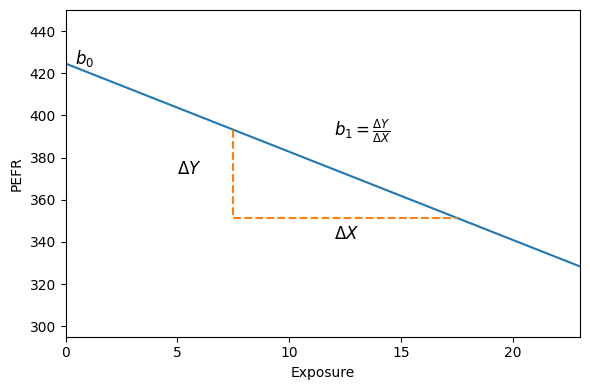

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlim(0, 23)
ax.set_ylim(295, 450)
ax.set_xlabel('Exposure')
ax.set_ylabel('PEFR')
ax.plot((0, 23), model.predict(pd.DataFrame({'Exposure': [0, 23]})))
ax.text(0.4, model.intercept_, r'$b_0$', size='larger')

x = pd.DataFrame({'Exposure': [7.5,17.5]})
y = model.predict(x)
ax.plot((7.5, 7.5, 17.5), (y[0], y[1], y[1]), '--')
ax.text(5, np.mean(y), r'$\Delta Y$', size='larger')
ax.text(12, y[1] - 10, r'$\Delta X$', size='larger')
ax.text(12, 390, r'$b_1 = \frac{\Delta Y}{\Delta X}$', size='larger')

plt.tight_layout()
plt.show()

## Fitted Values and Residuals
The method `predict` of a fitted _scikit-learn_ model can be used to predict new data points.

In [ ]:
fitted = model.predict(lung[predictors])
residuals = lung[outcome] - fitted

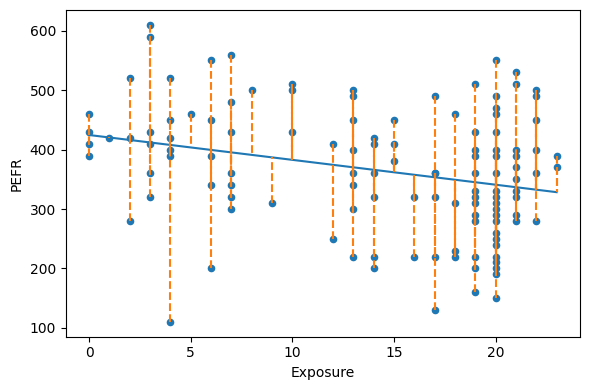

In [ ]:
ax = lung.plot.scatter(x='Exposure', y='PEFR', figsize=(6, 4))
ax.plot(lung.Exposure, fitted)
for x, yactual, yfitted in zip(lung.Exposure, lung.PEFR, fitted):
    ax.plot((x, x), (yactual, yfitted), '--', color='C1')

plt.tight_layout()
plt.show()

# Multiple linear regression

In [ ]:
subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms',
          'Bedrooms', 'BldgGrade']

house = pd.read_csv(HOUSE_CSV, sep='\t')
print(house[subset].head())

   AdjSalePrice  SqFtTotLiving  SqFtLot  Bathrooms  Bedrooms  BldgGrade
1      300805.0           2400     9373       3.00         6          7
2     1076162.0           3764    20156       3.75         4         10
3      761805.0           2060    26036       1.75         4          8
4      442065.0           3200     8618       3.75         5          7
5      297065.0           1720     8620       1.75         4          7


In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms',
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, house_lm.coef_):
    print(f' {name}: {coef}')

Intercept: -528724.348
Coefficients:
 SqFtTotLiving: 212.70792797091826
 SqFtLot: -0.014301274559301191
 Bathrooms: -18233.21174882069
 Bedrooms: -46574.19268657796
 BldgGrade: 108780.11134296592


**Intercept (-528724.348):**

The intercept represents the predicted value of the target variable when all predictor variables are zero. In other words, it is the expected value of the target variable when the values of SqFtTotLiving, SqFtLot, Bathrooms, Bedrooms, and BldgGrade are all zero.
In this case, when all predictor variables are zero, the model predicts a value of -528724.348 for the target variable.

**Coefficients:**

SqFtTotLiving (212.7079): A one-unit increase in the square footage of total living area is associated with an increase of approximately 212.7079 units in the target variable, assuming all other variables are held constant.
SqFtLot (-0.0143): A one-unit increase in the square footage of the lot is associated with a decrease of approximately 0.0143 units in the target variable, assuming all other variables are held constant.
Bathrooms (-18233.2117): Each additional bathroom is associated with a decrease of approximately 18233.2117 units in the target variable, assuming all other variables are held constant.
Bedrooms (-46574.1927): Each additional bedroom is associated with a decrease of approximately 46574.1927 units in the target variable, assuming all other variables are held constant.
BldgGrade (108780.1113): An increase in the building grade is associated with an increase of approximately 108780.1113 units in the target variable, assuming all other variables are held constant.
Putting it together, the linear regression equation can be expressed as:

Target Variable=−528724.348+212.7079×SqFtTotLiving−0.0143×SqFtLot−18233.2117×Bathrooms−46574.1927×Bedrooms+108780.1113×BldgGrade+Other Terms

This equation allows you to make predictions for the target variable based on the values of the predictor variables, with each coefficient indicating how changes in the corresponding predictor variable influence the predicted target variable.

## Assessing the Model
_Scikit-learn_ provides a number of metrics to determine the quality of a model. Here we use the `r2_score`.

In [ ]:
fitted = house_lm.predict(house[predictors])
RMSE = np.sqrt(mean_squared_error(house[outcome], fitted))
r2 = r2_score(house[outcome], fitted)
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')

RMSE: 259326
r2: 0.5348


**Root Mean Squared Error (RMSE):**

RMSE is a measure of the average magnitude of the errors between predicted and actual values.
In your case, an RMSE of 259326 means that, on average, the model's predictions are off by approximately 259326 units from the actual values.

**R^2 (R-squared):**

R^2 is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
In our case, an R^2 value of 0.5348 means that approximately 53.48% of the variance in the dependent variable is explained by the independent variables in our model. The rest of the variance is unexplained.

**Interpretation:**

The RMSE gives you a sense of the average magnitude of prediction errors. Lower RMSE values indicate better model performance, so a lower value would be preferable.
The R^2 value provides an indication of how well the model's predictions align with the actual values. A higher R^2 value suggests that a larger proportion of the variance in the dependent variable is captured by the model.

While _scikit-learn_ provides a variety of different metrics, _statsmodels_ provides a more in-depth analysis of the linear regression model. This package has two different ways of specifying the model, one that is similar to _scikit-learn_ and one that allows specifying _R_-style formulas. Here we use the first approach. As _statsmodels_ doesn't add an intercept automaticaly, we need to add a constant column with value 1 to the predictors. We can use the _pandas_ method assign for this.

In [ ]:
model = sm.OLS(house[outcome], house[predictors].assign(const=1))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     6222.
Date:                Thu, 11 Jan 2024   Prob (F-statistic):               0.00
Time:                        00:01:09   Log-Likelihood:            -3.7576e+05
No. Observations:               27063   AIC:                         7.515e+05
Df Residuals:                   27057   BIC:                         7.516e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   212.7079      3.401     62.552

## Model Selection and Stepwise Regression

In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType', 'NbrLivingUnits',
              'SqFtFinBasement', 'YrBuilt', 'YrRenovated',
              'NewConstruction']

X = pd.get_dummies(house[predictors], drop_first=True)
X['NewConstruction'] = [1 if nc else 0 for nc in X['NewConstruction']]

house_full = sm.OLS(house[outcome], X.assign(const=1))
results = house_full.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     3248.
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        06:07:27   Log-Likelihood:            -3.7405e+05
No. Observations:               27063   AIC:                         7.481e+05
Df Residuals:                   27050   BIC:                         7.482e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
SqFtTotLiving       

We can use the `stepwise_selection` method from the _dmba_ package.

In [ ]:
y = house[outcome]

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X[variables], y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]), model)

best_model, best_variables = stepwise_selection(X.columns, train_model, score_model,
                                                verbose=True)

print()
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

Variables: SqFtTotLiving, SqFtLot, Bathrooms, Bedrooms, BldgGrade, NbrLivingUnits, SqFtFinBasement, YrBuilt, YrRenovated, NewConstruction, PropertyType_Single Family, PropertyType_Townhouse
Start: score=772245.03, constant
Step: score=754910.45, add SqFtTotLiving
Step: score=752023.16, add BldgGrade
Step: score=749035.73, add YrBuilt
Step: score=748559.37, add Bedrooms
Step: score=748275.34, add Bathrooms
Step: score=748116.31, add PropertyType_Townhouse
Step: score=748113.49, add SqFtFinBasement
Step: score=748113.25, add PropertyType_Single Family
Step: score=748113.25, unchanged None

Intercept: 6227632.223
Coefficients:
 SqFtTotLiving: 186.5012214219897
 BldgGrade: 139179.22569572338
 YrBuilt: -3592.4675618887068
 Bedrooms: -49807.178485644574
 Bathrooms: 44721.72109363883
 PropertyType_Townhouse: 92216.25324971524
 SqFtFinBasement: 9.039911052794196
 PropertyType_Single Family: 23328.685220410374


## Weighted regression
We can calculate the Year from the date column using either a list comprehension or the data frame's `apply` method.

In [ ]:
house['Year'] = [int(date.split('-')[0]) for date in house.DocumentDate]
house['Year'] = house.DocumentDate.apply(lambda d: int(d.split('-')[0]))
house['Weight'] = house.Year - 2005

The coefficients in the weighted regression are slightly different from the original regression.

Most models in scikit-learn accept weights as the keyword argument sam
ple_weight in the call of the fit method:

In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms',
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_wt = LinearRegression()
house_wt.fit(house[predictors], house[outcome], sample_weight=house.Weight)

pd.concat([
    pd.DataFrame({
        'predictor': predictors,
        'house_lm': house_lm.coef_,
        'house_wt': house_wt.coef_,
    }),
    pd.DataFrame({
        'predictor': ['intercept'],
        'house_lm': house_lm.intercept_,
        'house_wt': house_wt.intercept_,
    })
])

,predictor,house_lm,house_wt
0,SqFtTotLiving,212.707928,229.945441
1,SqFtLot,-0.014301,-0.180740
2,Bathrooms,-18233.211749,-23335.485590
3,Bedrooms,-46574.192687,-54234.376222
4,BldgGrade,108780.111343,116037.062607
0,intercept,-528724.348047,-580378.014915


In [ ]:
residuals = pd.DataFrame({
    'abs_residual_lm': np.abs(house_lm.predict(house[predictors]) - house[outcome]),
    'abs_residual_wt': np.abs(house_wt.predict(house[predictors]) - house[outcome]),
    'Year': house['Year'],
})
print(residuals.head())
# axes = residuals.boxplot(['abs_residual_lm', 'abs_residual_wt'], by='Year', figsize=(10, 4))
# axes[0].set_ylim(0, 300000)

pd.DataFrame(([year, np.mean(group['abs_residual_lm']), np.mean(group['abs_residual_wt'])]
              for year, group in residuals.groupby('Year')),
             columns=['Year', 'mean abs_residual_lm', 'mean abs_residual_wt'])
# for year, group in residuals.groupby('Year'):
#     print(year, np.mean(group['abs_residual_lm']), np.mean(group['abs_residual_wt']))

   abs_residual_lm  abs_residual_wt  Year
1    108151.621271     85838.687471  2014
2     28587.834970     61256.671364  2006
3    200687.364975    202679.266822  2007
4    169968.044985    165404.260990  2008
5     83200.899170     70989.994742  2013


,Year,mean abs_residual_lm,mean abs_residual_wt
0,2006,140301.192933,145687.634781
1,2007,146842.626813,151410.007129
2,2008,137931.963873,141508.965192
3,2009,140534.687895,144244.344756
4,2010,154180.099452,156602.990398
5,2011,160235.297008,162278.024163
6,2012,158657.754195,160944.278818
7,2013,196160.689911,198662.512253
8,2014,186182.380589,188076.467771
9,2015,174706.643226,171719.514055


# Factor variables in regression
## Dummy Variables Representation

In [ ]:
print(house.PropertyType.head())

1        Multiplex
2    Single Family
3    Single Family
4    Single Family
5    Single Family
Name: PropertyType, dtype: object


In [ ]:
print(pd.get_dummies(house['PropertyType']).head(6))

   Multiplex  Single Family  Townhouse
1          1              0          0
2          0              1          0
3          0              1          0
4          0              1          0
5          0              1          0
6          0              0          1


In [ ]:
print(pd.get_dummies(house['PropertyType'], drop_first=True).head(6))

   Single Family  Townhouse
1              0          0
2              1          0
3              1          0
4              1          0
5              1          0
6              0          1


In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType']

X = pd.get_dummies(house[predictors], drop_first=True)

house_lm_factor = LinearRegression()
house_lm_factor.fit(X, house[outcome])

print(f'Intercept: {house_lm_factor.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, house_lm_factor.coef_):
    print(f' {name}: {coef}')

Intercept: -440890.853
Coefficients:
 SqFtTotLiving: 207.23954229359651
 SqFtLot: -0.023138958459954395
 Bathrooms: -14996.674366959285
 Bedrooms: -49570.07618833295
 BldgGrade: 112183.58059922788
 PropertyType_Single Family: -98192.29974717955
 PropertyType_Townhouse: -118938.43483445115


## Factor Variables with many levels

In [ ]:
print(pd.DataFrame(house['ZipCode'].value_counts()).transpose())

         -1       98038   98103   98042   98115   98117   98052   98034  \
ZipCode    4374     788     671     641     620     619     614     575   

          98033   98059  ...   98354   98050   98057   98288   98224   98068  \
ZipCode     517     513  ...       9       7       4       4       3       1   

          98113   9800    89118   98043  
ZipCode       1       1       1       1  

[1 rows x 83 columns]


In [ ]:
house = pd.read_csv(HOUSE_CSV, sep='\t')

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms',
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])


zip_groups = pd.DataFrame([
    *pd.DataFrame({
        'ZipCode': house['ZipCode'],
        'residual' : house[outcome] - house_lm.predict(house[predictors]),
    })
    .groupby(['ZipCode'])
    .apply(lambda x: {
        'ZipCode': x.iloc[0,0],
        'count': len(x),
        'median_residual': x.residual.median()
    })
]).sort_values('median_residual')
zip_groups['cum_count'] = np.cumsum(zip_groups['count'])
zip_groups['ZipGroup'] = pd.qcut(zip_groups['cum_count'], 5, labels=False, retbins=False)
zip_groups.head()
print(zip_groups.ZipGroup.value_counts().sort_index())

0    17
1    16
2    17
3    16
4    17
Name: ZipGroup, dtype: int64


In [ ]:
to_join = zip_groups[['ZipCode', 'ZipGroup']].set_index('ZipCode')
house = house.join(to_join, on='ZipCode')
house['ZipGroup'] = house['ZipGroup'].astype('category')

# Interpreting the Regression Equation
## Correlated predictors

The results from the stepwise regression are.

In [ ]:
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

Intercept: 6227632.223
Coefficients:
 SqFtTotLiving: 186.5012214219897
 BldgGrade: 139179.22569572338
 YrBuilt: -3592.4675618887068
 Bedrooms: -49807.178485644574
 Bathrooms: 44721.72109363883
 PropertyType_Townhouse: 92216.25324971524
 SqFtFinBasement: 9.039911052794196
 PropertyType_Single Family: 23328.685220410374


In [ ]:
predictors = ['Bedrooms', 'BldgGrade', 'PropertyType', 'YrBuilt']
outcome = 'AdjSalePrice'

X = pd.get_dummies(house[predictors], drop_first=True)

reduced_lm = LinearRegression()
reduced_lm.fit(X, house[outcome])


print(f'Intercept: {reduced_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, reduced_lm.coef_):
    print(f' {name}: {coef}')

Intercept: 4834679.732
Coefficients:
 Bedrooms: 27656.816554225657
 BldgGrade: 245709.38992930102
 YrBuilt: -3160.629201101343
 PropertyType_Single Family: -17603.91511703555
 PropertyType_Townhouse: -47477.23666411602


## Confounding variables

In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType', 'ZipGroup']
outcome = 'AdjSalePrice'

X = pd.get_dummies(house[predictors], drop_first=True)

confounding_lm = LinearRegression()
confounding_lm.fit(X, house[outcome])

print(f'Intercept: {confounding_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, confounding_lm.coef_):
    print(f' {name}: {coef}')

Intercept: -677704.741
Coefficients:
 SqFtTotLiving: 193.65643195950727
 SqFtLot: 0.3545579266488659
 Bathrooms: 8601.372268904668
 Bedrooms: -39162.11067529127
 BldgGrade: 105173.07791335056
 PropertyType_Single Family: 2045.564332558079
 PropertyType_Townhouse: -21419.373845020058
 ZipGroup_1: 58157.50729246906
 ZipGroup_2: 101551.16020696703
 ZipGroup_3: 170540.65609438883
 ZipGroup_4: 326770.9393570556


## Interactions and Main Effects

In [ ]:
model = smf.ols(formula='AdjSalePrice ~  SqFtTotLiving*ZipGroup + SqFtLot + ' +
     'Bathrooms + Bedrooms + BldgGrade + PropertyType', data=house)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     3544.
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        06:10:05   Log-Likelihood:            -3.7141e+05
No. Observations:               27063   AIC:                         7.429e+05
Df Residuals:                   27047   BIC:                         7.430e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

> Results differ from R due to different binning. Enforcing the same binning gives identical results

# Testing the Assumptions: Regression Diagnostics
## Outliers

The _statsmodels_ package has the most developed support for outlier analysis.

In [ ]:
house_98105 = house.loc[house['ZipCode'] == 98105, ]

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade']
outcome = 'AdjSalePrice'

house_outlier = sm.OLS(house_98105[outcome], house_98105[predictors].assign(const=1))
result_98105 = house_outlier.fit()
print(result_98105.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     238.7
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          1.69e-103
Time:                        06:10:10   Log-Likelihood:                -4226.0
No. Observations:                 313   AIC:                             8464.
Df Residuals:                     307   BIC:                             8486.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   209.6023     24.408      8.587

The `OLSInfluence` class is initialized with the OLS regression results and gives access to a number of usefule properties. Here we use the studentized residuals.

In [ ]:
influence = OLSInfluence(result_98105)
sresiduals = influence.resid_studentized_internal

print(sresiduals.idxmin(), sresiduals.min())

24333 -4.32673180407856


In [ ]:
print(result_98105.resid.loc[sresiduals.idxmin()])

-757753.6192115822


In [ ]:
outlier = house_98105.loc[sresiduals.idxmin(), :]
print('AdjSalePrice', outlier[outcome])
print(outlier[predictors])

AdjSalePrice 119748.0
SqFtTotLiving    2900
SqFtLot          7276
Bathrooms         3.0
Bedrooms            6
BldgGrade           7
Name: 24333, dtype: object


In this case, it appears that there is something wrong with the record: a house of that size typically sells for much more than $119,748 in that zip code.

The outlier corresponds to a sale that is anomalous and should not be included in the regression. Outliers could also be the result of other problems, such as a “fat-finger” data entry or a mismatch of units (e.g., reporting a sale in thousands of dollars rather than simply in dollars).

## Influential values

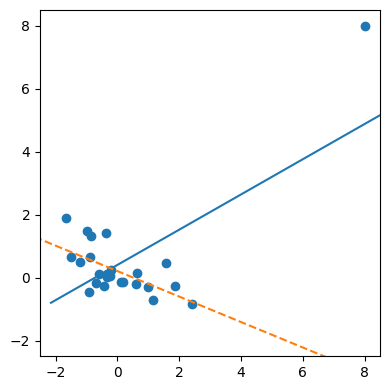

In [ ]:
%matplotlib inline
from scipy.stats import linregress

np.random.seed(5)
x = np.random.normal(size=25)
y = -x / 5 + np.random.normal(size=25)
x[0] = 8
y[0] = 8

def abline(slope, intercept, ax):
    """Calculate coordinates of a line based on slope and intercept"""
    x_vals = np.array(ax.get_xlim())
    return (x_vals, intercept + slope * x_vals)

fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(x, y)
slope, intercept, _, _, _ = linregress(x, y)
ax.plot(*abline(slope, intercept, ax))
slope, intercept, _, _, _ = linregress(x[1:], y[1:])
ax.plot(*abline(slope, intercept, ax), '--')
ax.set_xlim(-2.5, 8.5)
ax.set_ylim(-2.5, 8.5)

plt.tight_layout()
plt.show()

The package _statsmodel_ provides a number of plots to analyze the data point influence

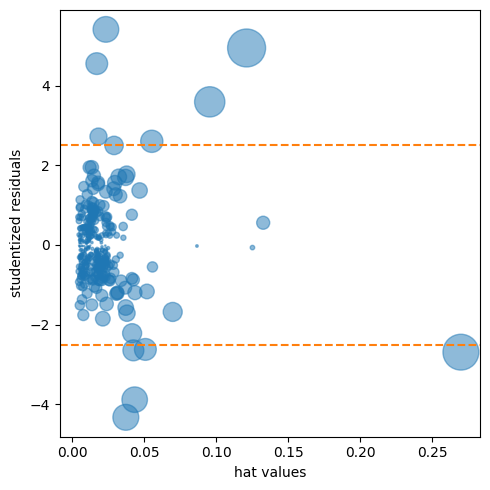

In [ ]:
influence = OLSInfluence(result_98105)
fig, ax = plt.subplots(figsize=(5, 5))
ax.axhline(-2.5, linestyle='--', color='C1')
ax.axhline(2.5, linestyle='--', color='C1')
ax.scatter(influence.hat_matrix_diag, influence.resid_studentized_internal,
           s=1000 * np.sqrt(influence.cooks_distance[0]),
           alpha=0.5)

ax.set_xlabel('hat values')
ax.set_ylabel('studentized residuals')

plt.tight_layout()
plt.show()

In [ ]:
mask = [dist < .08 for dist in influence.cooks_distance[0]]
house_infl = house_98105.loc[mask]

ols_infl = sm.OLS(house_infl[outcome], house_infl[predictors].assign(const=1))
result_infl = ols_infl.fit()

pd.DataFrame({
    'Original': result_98105.params,
    'Influential removed': result_infl.params,
})

,Original,Influential removed
SqFtTotLiving,209.602346,230.052569
SqFtLot,38.933315,33.141600
Bathrooms,2282.264145,-16131.879785
Bedrooms,-26320.268796,-22887.865318
BldgGrade,130000.099737,114870.559737
const,-772549.862447,-647137.096716


## Heteroskedasticity, Non-Normality and Correlated Errors

The `regplot` in _seaborn_ allows adding a lowess smoothing line to the scatterplot.

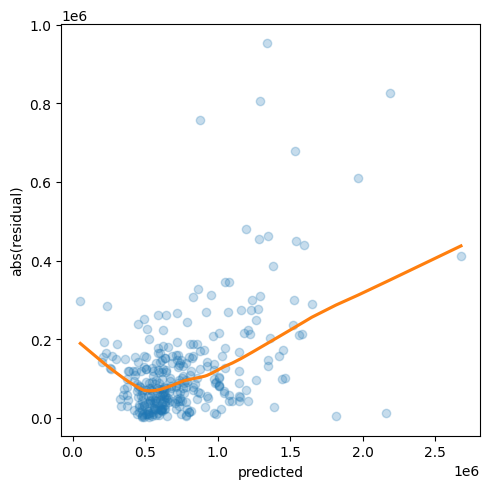

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.regplot(x=result_98105.fittedvalues, y=np.abs(result_98105.resid),
            scatter_kws={'alpha': 0.25},
            line_kws={'color': 'C1'},
            lowess=True, ax=ax)
ax.set_xlabel('predicted')
ax.set_ylabel('abs(residual)')

plt.tight_layout()
plt.show()

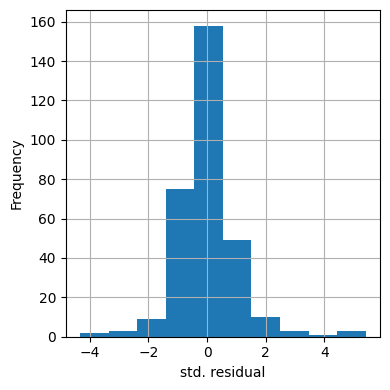

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
pd.Series(influence.resid_studentized_internal).hist(ax=ax)
ax.set_xlabel('std. residual')
ax.set_ylabel('Frequency')


plt.tight_layout()
plt.show()

## Partial Residual Plots and Nonlinearity

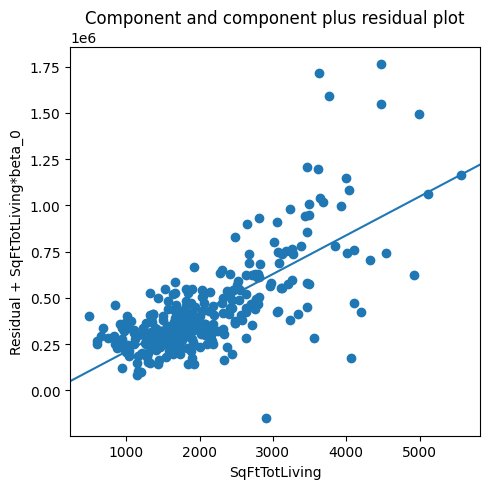

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
fig = sm.graphics.plot_ccpr(result_98105, 'SqFtTotLiving', ax=ax)

plt.tight_layout()
plt.show()

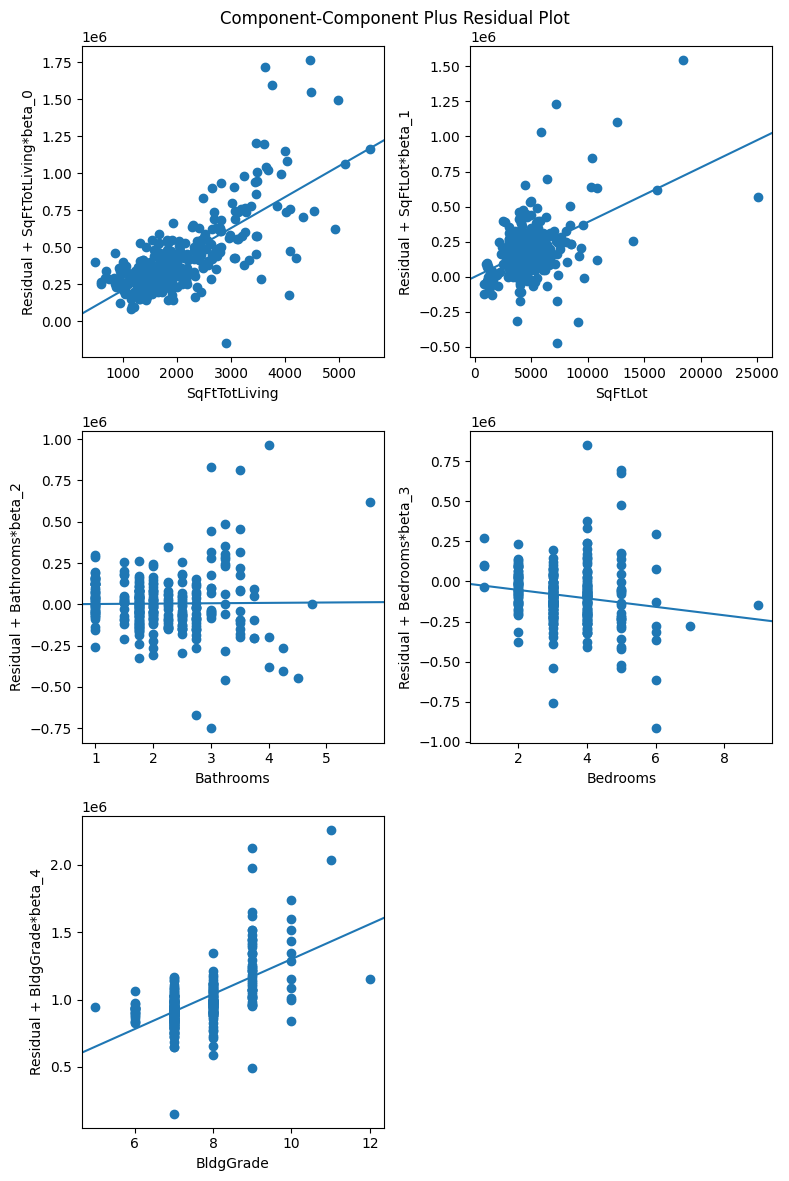

In [ ]:
fig = plt.figure(figsize=(8, 12))
fig = sm.graphics.plot_ccpr_grid(result_98105, fig=fig)

## Polynomial and Spline Regression

In [ ]:
model_poly = smf.ols(formula='AdjSalePrice ~  SqFtTotLiving + np.power(SqFtTotLiving, 2) + ' +
                'SqFtLot + Bathrooms + Bedrooms + BldgGrade', data=house_98105)
result_poly = model_poly.fit()
print(result_poly.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     211.6
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          9.95e-106
Time:                        06:11:06   Log-Likelihood:                -4217.9
No. Observations:                 313   AIC:                             8450.
Df Residuals:                     306   BIC:                             8476.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

The statsmodels implementation of a partial residual plot works only for linear term. Here is an implementation of a partial residual plot that, while inefficient, works for the polynomial regression.

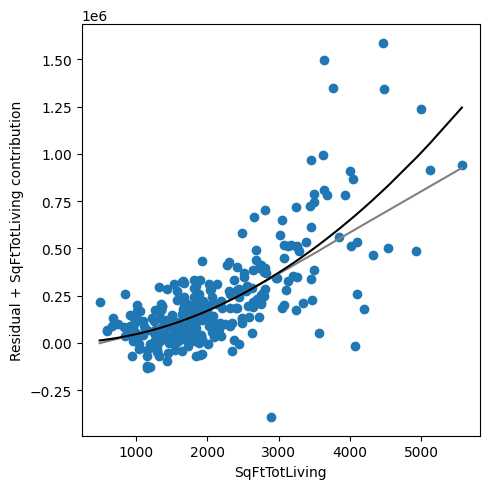

0.03879128168231146


In [ ]:
def partialResidualPlot(model, df, outcome, feature, ax):
    y_pred = model.predict(df)
    copy_df = df.copy()
    for c in copy_df.columns:
        if c == feature:
            continue
        copy_df[c] = 0.0
    feature_prediction = model.predict(copy_df)
    results = pd.DataFrame({
        'feature': df[feature],
        'residual': df[outcome] - y_pred,
        'ypartial': feature_prediction - model.params[0],
    })
    results = results.sort_values(by=['feature'])
    smoothed = sm.nonparametric.lowess(results.ypartial, results.feature, frac=1/3)

    ax.scatter(results.feature, results.ypartial + results.residual)
    ax.plot(smoothed[:, 0], smoothed[:, 1], color='gray')
    ax.plot(results.feature, results.ypartial, color='black')
    ax.set_xlabel(feature)
    ax.set_ylabel(f'Residual + {feature} contribution')
    return ax

fig, ax = plt.subplots(figsize=(5, 5))
partialResidualPlot(result_poly, house_98105, 'AdjSalePrice', 'SqFtTotLiving', ax)

plt.tight_layout()
plt.show()
print(result_poly.params[2])

## Splines

In [ ]:
formula = ('AdjSalePrice ~ bs(SqFtTotLiving, df=6, degree=3) + ' +
           'SqFtLot + Bathrooms + Bedrooms + BldgGrade')
model_spline = smf.ols(formula=formula, data=house_98105)
result_spline = model_spline.fit()
print(result_spline.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     131.8
Date:                Mon, 11 Sep 2023   Prob (F-statistic):          7.10e-104
Time:                        06:11:16   Log-Likelihood:                -4211.4
No. Observations:                 313   AIC:                             8445.
Df Residuals:                     302   BIC:                             8486.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


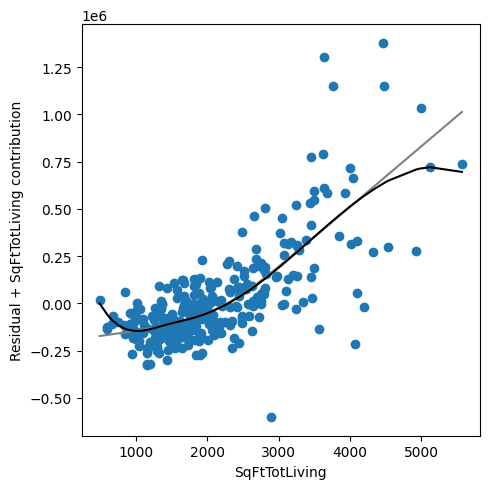

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
partialResidualPlot(result_spline, house_98105, 'AdjSalePrice', 'SqFtTotLiving', ax)

plt.tight_layout()
plt.show()

## Generalized Additive Models

In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms',
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'
X = house_98105[predictors].values
y = house_98105[outcome]

## model
gam = LinearGAM(s(0, n_splines=12) + l(1) + l(2) + l(3) + l(4))
gam.gridsearch(X, y)
print(gam.summary())

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      7.6772
Link Function:                     IdentityLink Log Likelihood:                                 -7833.1159
Number of Samples:                          313 AIC:                                            15683.5863
                                                AICc:                                             15684.14
                                                GCV:                                      30838885095.1677
                                                Scale:                                    29480381715.8292
                                                Pseudo R-Squared:                                   0.8117
Feature Function                  Lam

<ipython-input-54-ed5b4d537cfe>:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


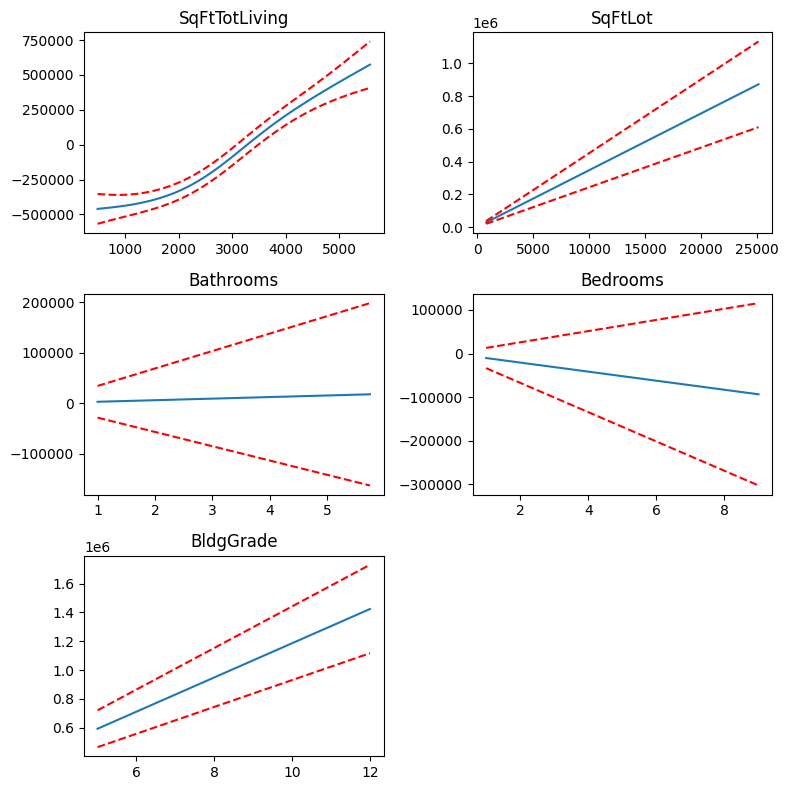

In [ ]:
fig, axes = plt.subplots(figsize=(8, 8), ncols=2, nrows=3)

titles = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
for i, title in enumerate(titles):
    ax = axes[i // 2, i % 2]
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(titles[i]);

axes[2][1].set_visible(False)

plt.tight_layout()
plt.show()

# Additional material - not in book
# Regularization
## Lasso

In [ ]:
from sklearn.linear_model import Lasso, LassoLars, LassoCV, LassoLarsCV
from sklearn.preprocessing import StandardScaler

In [ ]:
subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms',
          'Bedrooms', 'BldgGrade']

house = pd.read_csv(HOUSE_CSV, sep='\t')
print(house[subset].head())

   AdjSalePrice  SqFtTotLiving  SqFtLot  Bathrooms  Bedrooms  BldgGrade
1      300805.0           2400     9373       3.00         6          7
2     1076162.0           3764    20156       3.75         4         10
3      761805.0           2060    26036       1.75         4          8
4      442065.0           3200     8618       3.75         5          7
5      297065.0           1720     8620       1.75         4          7


In [ ]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType', 'NbrLivingUnits',
              'SqFtFinBasement', 'YrBuilt', 'YrRenovated',
              'NewConstruction']
outcome = 'AdjSalePrice'

X = pd.get_dummies(house[predictors], drop_first=True)
X['NewConstruction'] = [1 if nc else 0 for nc in X['NewConstruction']]
columns = X.columns
# X = StandardScaler().fit_transform(X * 1.0)
y = house[outcome]

house_lm = LinearRegression()
print(house_lm.fit(X, y))

LinearRegression()


In [ ]:
house_lasso = Lasso(alpha=10)
print(house_lasso.fit(X, y))

Lasso(alpha=10)


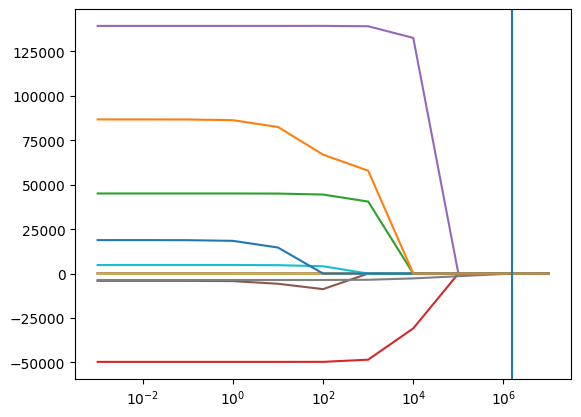

In [ ]:
Method = LassoLars
MethodCV = LassoLarsCV
Method = Lasso
MethodCV = LassoCV

alpha_values = []
results = []
for alpha in [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]:
    model = Method(alpha=alpha)
    model.fit(X, y)
    alpha_values.append(alpha)
    results.append(model.coef_)
modelCV = MethodCV(cv=5)
modelCV.fit(X, y)
ax = pd.DataFrame(results, index=alpha_values, columns=columns).plot(logx=True, legend=False)
ax.axvline(modelCV.alpha_)
plt.show()

In [ ]:
pd.DataFrame({
    'name': columns,
    'coef': modelCV.coef_,
})

,name,coef
0,SqFtTotLiving,272.580210
1,SqFtLot,0.039142
2,Bathrooms,0.000000
3,Bedrooms,-0.000000
4,BldgGrade,0.000000
5,NbrLivingUnits,-0.000000
6,SqFtFinBasement,15.238082
7,YrBuilt,-0.000000
8,YrRenovated,47.225210
9,NewConstruction,-0.000000


In [ ]:
# Intercept: 6177658.144
# Coefficients:
#  SqFtTotLiving: 199.27474217544048
#  BldgGrade: 137181.13724627026
#  YrBuilt: -3564.934870415041
#  Bedrooms: -51974.76845567939
#  Bathrooms: 42403.059999677665
#  PropertyType_Townhouse: 84378.9333363999
#  SqFtFinBasement: 7.032178917565108
#  PropertyType_Single Family: 22854.87954019308